In [1]:
import os
import sys
import dask
import uproot4
import numpy as np
import pandas as pd
from hist import Hist
import hist
import uproot4 as uproot
from dask.array import histogram as ds_hist
import dask.dataframe as dd
import timeit
from distributed import Client
import Histogramming.storage_functions as sf
import time
import psutil
import matplotlib.pyplot as plt
import pyarrow as pa
import re
import subprocess
from pympler import asizeof
import Histogramming.hist_vars as hist_vars
import itertools
import Histogramming.hist_wrapper as hist_wrapper
from hurry.filesize import size
import pyarrow.parquet as pq
import Histogramming.test as tt

In [2]:
hist_vars.var_main['rljet_pt_comb']

Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]')

In [3]:
delayed_dict, client, names = tt.fill_all()

Client Dashboard: http://127.0.0.1:8787/status


In [4]:
names[0][1][10]

('/eos/atlas/atlascerngroupdisk/perf-jets/JSS/WTopBackgroundSF2019/UFO_test/slimmed_SEP_v2/user.brle.305440.Sherpa.DAOD_JETM6.e5020_s3126_r10724_p4308.mc16e_gammajet_210921_sys_v2_output_root_0.h5',
 [('high_pt', ['test']), ('low_pt', ['test'])])

In [ ]:
delayed_dict

In [6]:
temp = dask.compute(delayed_dict)[0]

In [8]:
temp[0][10][0][0][0]

Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double()) # Sum: 7871.0 (10480.0 with flow)

In [18]:
temp[0][10][0][0][0].axes[0].edges

array([300000., 315000., 330000., 345000., 360000., 375000., 390000.,
       405000., 420000., 435000., 450000., 465000., 480000., 495000.,
       510000., 525000., 540000., 555000., 570000., 585000., 600000.])

In [101]:
(431323+388619+341127+296292+257391+223628+198275+175785+159549+148516+836218+757282+673852+600882+536209+477217+421328+370799+325041+285276)/(4223797+4013917)

0.9595634177151574

In [8]:
client.close()

In [9]:
dask.config.set({'temporary_directory': '/tmp/kmalirz'})

In [10]:
(Hist(hist.axis.Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]')))

Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double())

In [11]:
#(sf.Histogram_wrapper(hist.axis.Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'),name='x'))

In [12]:
histo_var_dict = sf.combine_dicts([hist_vars.var_main, hist_vars.var_series, hist_vars.var_beta, 
                               hist_vars.var_ecf_beta, hist_vars.var_dichoric, hist_vars.var_ecfg])

In [13]:
#histo_var_dict = dict(itertools.islice(histo_var_dict.items(), 10))

In [14]:
len(histo_var_dict)

93

In [15]:
histogramming = sf.HistoMaker()

In [16]:
client = histogramming.client_start(n_workers = 4,memory_limit='5GB',threads_per_worker=1)

In [17]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 18.63 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35859,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 18.63 GiB
Comm: tcp://127.0.0.1:40414,Total threads: 1
Dashboard: http://127.0.0.1:39927/status,Memory: 4.66 GiB
Nanny: tcp://127.0.0.1:43382,


In [18]:
client.dashboard_link

'http://127.0.0.1:8787/status'

In [19]:

x = histogramming.create_file_list(top_directory = '/eos/atlas/atlascerngroupdisk/perf-jets/JSS/WTopBackgroundSF2019/UFO_test/slimmed_SEP_v2/',file_regex = '(?=^[^.].)(.*gammajet_210921.*|.*15.*)(.*h5$)')

In [20]:
size(sum([os.path.getsize(y) for y in x[:]]))

'6G'

In [21]:
#size(file_size)

In [22]:
len(x)

953

In [23]:
x[10]

'/eos/atlas/atlascerngroupdisk/perf-jets/JSS/WTopBackgroundSF2019/UFO_test/slimmed_SEP_v2/user.brle.305440.Sherpa.DAOD_JETM6.e5020_s3126_r10724_p4308.mc16e_gammajet_210921_sys_v2_output_root_0.h5'

In [24]:
data = histogramming.load_h5(x[10])

In [25]:
test = data.compute()

In [26]:
test['rljet_pt_comb'].describe()

count    1.000300e+05
mean     2.896004e+05
std      1.143200e+05
min      2.000011e+05
25%      2.243313e+05
50%      2.543626e+05
75%      3.078037e+05
max      3.114150e+06
Name: rljet_pt_comb, dtype: float64

In [27]:
test

,,rljet_PlanarFlow,rljet_D2_Beta1p5,rljet_ECF2_Beta2p3,rljet_topTag_DNN20_TausRatio_inclusive_score,rljet_ECF1,rljet_ECFG_3_1_1,rljet_D2_Beta0p5,rljet_N3,rljet_ECF2_Beta0p5,rljet_ECF3,...,rljet_ECFG_3_2,rljet_Tau2_wta,rljet_M2,rljet_ECFG_3_3_2,rljet_Tau3_wta,rljet_ECF2_Beta1p5,rljet_D2,weight_mc,weight_pileup,weight_photonSF
entry,subentry,,,,,,,,,,,,,,,,,,,,,
0,0,0.534721,1.133636,1.593636e+10,0.323254,218914.171875,0.048651,1.314431,1.370375,1.823086e+10,5.166867e+14,...,0.041127,0.265241,0.142426,0.036170,0.161158,1.569290e+10,1.235680,0.692468,1.228542,1.066259
1,0,0.725050,1.658883,7.359397e+09,0.386134,223427.265625,0.021935,1.504013,1.693881,1.375320e+10,1.681498e+14,...,0.015698,0.125344,0.103054,0.007149,0.087494,8.962613e+09,1.563442,0.692468,1.130535,1.051300
2,0,0.225306,0.952670,6.047020e+09,0.337166,215798.656250,0.010905,1.628677,1.892612,1.083015e+10,6.892022e+13,...,0.007371,0.076940,0.063580,0.001701,0.063836,6.887417e+09,1.359061,0.692468,1.185081,1.044067
3,0,0.687920,2.110960,1.904809e+09,0.166389,191267.171875,0.006563,2.212845,2.801329,5.750606e+09,1.804435e+13,...,0.003611,0.061034,0.062692,0.000428,0.049810,2.847316e+09,2.247458,0.692468,1.199548,1.033128
4,0,0.661525,1.057870,3.905350e+10,0.714815,434953.187500,0.033445,1.306846,1.311534,6.313214e+10,2.024147e+15,...,0.025967,0.192250,0.122005,0.009537,0.090981,4.536540e+10,1.194121,0.692468,1.181300,1.044550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100025,0,0.796815,1.156144,2.284682e+10,0.366826,279207.375000,0.038182,1.401102,1.540087,2.698180e+10,8.373800e+14,...,0.033603,0.229269,0.123137,0.025735,0.146999,2.306274e+10,1.290382,0.692468,0.182012,1.089438
100026,0,0.795406,1.865818,4.990389e+09,0.102882,181211.781250,0.019936,1.664451,1.846682,8.707447e+09,8.830402e+13,...,0.014634,0.140635,0.098823,0.007910,0.113506,5.720001e+09,1.807538,0.692468,1.130535,1.066259
100027,0,0.532137,2.496276,6.660182e+09,0.304894,226025.859375,0.008507,2.104768,2.540080,1.001132e+10,9.638132e+13,...,0.006984,0.067566,0.055673,0.006427,0.051118,7.117860e+09,2.339552,0.692468,1.181300,1.061614


In [28]:
table = pa.Table.from_pandas(test)

pq.write_table(table, '/tmp/kmalirz/example.parquet')

table2 = pq.read_table('/tmp/kmalirz/example.parquet')

table2.to_pandas().head(10)

,,rljet_PlanarFlow,rljet_D2_Beta1p5,rljet_ECF2_Beta2p3,rljet_topTag_DNN20_TausRatio_inclusive_score,rljet_ECF1,rljet_ECFG_3_1_1,rljet_D2_Beta0p5,rljet_N3,rljet_ECF2_Beta0p5,rljet_ECF3,...,rljet_ECFG_3_2,rljet_Tau2_wta,rljet_M2,rljet_ECFG_3_3_2,rljet_Tau3_wta,rljet_ECF2_Beta1p5,rljet_D2,weight_mc,weight_pileup,weight_photonSF
entry,subentry,,,,,,,,,,,,,,,,,,,,,
0,0,0.534721,1.133636,1.593636e+10,0.323254,218914.171875,0.048651,1.314431,1.370375,1.823086e+10,5.166867e+14,...,0.041127,0.265241,0.142426,0.036170,0.161158,1.569290e+10,1.235680,0.692468,1.228542,1.066259
1,0,0.725050,1.658883,7.359397e+09,0.386134,223427.265625,0.021935,1.504013,1.693881,1.375320e+10,1.681498e+14,...,0.015698,0.125344,0.103054,0.007149,0.087494,8.962613e+09,1.563442,0.692468,1.130535,1.051300
2,0,0.225306,0.952670,6.047020e+09,0.337166,215798.656250,0.010905,1.628677,1.892612,1.083015e+10,6.892022e+13,...,0.007371,0.076940,0.063580,0.001701,0.063836,6.887417e+09,1.359061,0.692468,1.185081,1.044067
3,0,0.687920,2.110960,1.904809e+09,0.166389,191267.171875,0.006563,2.212845,2.801329,5.750606e+09,1.804435e+13,...,0.003611,0.061034,0.062692,0.000428,0.049810,2.847316e+09,2.247458,0.692468,1.199548,1.033128
4,0,0.661525,1.057870,3.905350e+10,0.714815,434953.187500,0.033445,1.306846,1.311534,6.313214e+10,2.024147e+15,...,0.025967,0.192250,0.122005,0.009537,0.090981,4.536540e+10,1.194121,0.692468,1.181300,1.044550
5,0,0.749993,1.333920,1.262457e+10,0.600415,214069.750000,0.037879,1.331348,1.295054,1.597043e+10,3.730859e+14,...,0.032679,0.192792,0.123355,0.029564,0.097856,1.316264e+10,1.313501,0.692468,0.142278,1.066259
6,0,0.930430,1.812196,9.891694e+09,0.571124,190482.406250,0.032998,1.569143,1.572732,1.158134e+10,2.704175e+14,...,0.031048,0.202991,0.115648,0.039514,0.117888,9.933030e+09,1.684361,0.692468,1.144741,1.089438
7,0,0.250215,0.883930,4.864895e+09,0.820291,241840.375000,0.011475,1.177170,1.554014,1.432610e+10,6.642554e+13,...,0.006264,0.051881,0.067823,0.000791,0.040806,7.353320e+09,0.969621,0.692468,1.369445,1.147672
8,0,0.509395,2.674736,7.529073e+09,0.078427,347912.843750,0.005211,2.293066,2.271265,1.902860e+10,1.036569e+14,...,0.002757,0.047877,0.055447,0.000676,0.039472,9.033190e+09,2.965949,0.692468,1.161152,1.114743


In [29]:
df = dd.read_parquet('/tmp/kmalirz/example.parquet')

df

,rljet_PlanarFlow,rljet_D2_Beta1p5,rljet_ECF2_Beta2p3,rljet_topTag_DNN20_TausRatio_inclusive_score,rljet_ECF1,rljet_ECFG_3_1_1,rljet_D2_Beta0p5,rljet_N3,rljet_ECF2_Beta0p5,rljet_ECF3,rljet_C2,rljet_D2_Beta2p0,rljet_ThrustMin,rljet_Dichroic_Tau32_wta,rljet_C1_Beta0p5,rljet_C3_Beta1p2,rljet_Dichroic_Tau21_wta,rljet_FoxWolfram2,rljet_Dichroic_D2,rljet_ECF2_Beta1p7,rljet_ECF3_Beta2p0,rljet_Tau4_wta,rljet_ungroomed_ntrk500,rljet_Tau42_wta,rljet_L1,rljet_D2_Beta1p7,rljet_L5,rljet_pt_comb,rljet_ECFG_3_3_1,rljet_L4,rljet_C1_Beta1p2,rljet_ECF3_Beta1p5,rljet_Dichroic_Tau42_wta,"rljet_m_comb[:,0]",rljet_ECFG_4_2_2,rljet_ECFG_3_1,rljet_ECF3_Beta0p5,rljet_D2_Beta1p2,rljet_Split34,rljet_C3_Beta1p5,rljet_Tau32_wta,rljet_topTag_DNN20_qqb_score,rljet_ECFG_2_1_2,rljet_ECF3_Beta1p2,rljet_C1_Beta1p5,rljet_ECFG_4_2,rljet_L2,rljet_ECFG_2_1,rljet_Tau1_wta,rljet_topTag_DNN20_TausRatio_qqb_score,rljet_C3_Beta1p7,rljet_ECF3_Beta1p7,rljet_Sphericity,rljet_ECF2,rljet_ECF3_Beta2p3,rljet_FoxWolfram0,rljet_ThrustMaj,rljet_ECF2_Beta1p2,rljet_topTag_DNN20_inclusive_score,rljet_ECF2_Beta2p0,rljet_Split23,rljet_Dichroic_M2,rljet_N2,rljet_n_constituents,rljet_C1_Beta1p7,rljet_C2_Beta2p3,rljet_C2_Beta0p5,rljet_Aplanarity,rljet_C2_Beta2p0,rljet_KtDR,rljet_ZCut12,rljet_C2_Beta1p7,rljet_topTag_DNN19_qqb_score,rljet_C2_Beta1p2,rljet_Dichroic_N2,rljet_D2_Beta2p3,rljet_ECFG_3_2_1,rljet_ECFG_4_4_1,rljet_Angularity,rljet_C1_Beta2p0,rljet_C3_Beta2p3,rljet_Mu12,rljet_L3,rljet_ECFG_3_2_2,rljet_C2_Beta1p5,rljet_C3_Beta0p5,rljet_C3_Beta2p0,rljet_Qw,rljet_Dip12,rljet_C1_Beta2p3,rljet_topTag_DNN19_inclusive_score,rljet_Split12,rljet_ECFG_3_2,rljet_Tau2_wta,rljet_M2,rljet_ECFG_3_3_2,rljet_Tau3_wta,rljet_ECF2_Beta1p5,rljet_D2,weight_mc,weight_pileup,weight_photonSF
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [30]:
df = df.repartition(npartitions=2)

df.npartitions

2

In [31]:
df.partitions[0].compute()

,,rljet_PlanarFlow,rljet_D2_Beta1p5,rljet_ECF2_Beta2p3,rljet_topTag_DNN20_TausRatio_inclusive_score,rljet_ECF1,rljet_ECFG_3_1_1,rljet_D2_Beta0p5,rljet_N3,rljet_ECF2_Beta0p5,rljet_ECF3,...,rljet_ECFG_3_2,rljet_Tau2_wta,rljet_M2,rljet_ECFG_3_3_2,rljet_Tau3_wta,rljet_ECF2_Beta1p5,rljet_D2,weight_mc,weight_pileup,weight_photonSF
entry,subentry,,,,,,,,,,,,,,,,,,,,,
0,0,0.534721,1.133636,1.593636e+10,0.323254,218914.171875,0.048651,1.314431,1.370375,1.823086e+10,5.166867e+14,...,0.041127,0.265241,0.142426,0.036170,0.161158,1.569290e+10,1.235680,0.692468,1.228542,1.066259
1,0,0.725050,1.658883,7.359397e+09,0.386134,223427.265625,0.021935,1.504013,1.693881,1.375320e+10,1.681498e+14,...,0.015698,0.125344,0.103054,0.007149,0.087494,8.962613e+09,1.563442,0.692468,1.130535,1.051300
2,0,0.225306,0.952670,6.047020e+09,0.337166,215798.656250,0.010905,1.628677,1.892612,1.083015e+10,6.892022e+13,...,0.007371,0.076940,0.063580,0.001701,0.063836,6.887417e+09,1.359061,0.692468,1.185081,1.044067
3,0,0.687920,2.110960,1.904809e+09,0.166389,191267.171875,0.006563,2.212845,2.801329,5.750606e+09,1.804435e+13,...,0.003611,0.061034,0.062692,0.000428,0.049810,2.847316e+09,2.247458,0.692468,1.199548,1.033128
4,0,0.661525,1.057870,3.905350e+10,0.714815,434953.187500,0.033445,1.306846,1.311534,6.313214e+10,2.024147e+15,...,0.025967,0.192250,0.122005,0.009537,0.090981,4.536540e+10,1.194121,0.692468,1.181300,1.044550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50010,0,0.724936,1.880922,3.752423e+10,0.412003,449240.156250,0.040095,1.452348,1.479447,6.692246e+10,2.605378e+15,...,0.027691,0.231817,0.154686,0.015847,0.158232,4.423470e+10,1.650128,0.692468,1.315443,1.037165
50011,0,0.756814,2.762004,2.662720e+09,0.053734,484455.562500,0.008626,1.683275,1.771816,3.698881e+10,7.605849e+13,...,0.001910,0.057031,0.126891,0.000017,0.050219,7.597122e+09,2.129198,0.692468,1.211519,1.050863
50012,0,0.403206,1.121904,2.962838e+09,0.264000,239615.875000,0.014323,1.416124,1.588980,1.302847e+10,4.578327e+13,...,0.005784,0.089934,0.104363,0.000255,0.073881,5.218337e+09,1.287429,0.692468,1.079264,1.083457


In [32]:
histogramming.histogram_variables

{}

In [33]:
zzzzzz = data.compute()

In [34]:
zzzzzz

,,rljet_PlanarFlow,rljet_D2_Beta1p5,rljet_ECF2_Beta2p3,rljet_topTag_DNN20_TausRatio_inclusive_score,rljet_ECF1,rljet_ECFG_3_1_1,rljet_D2_Beta0p5,rljet_N3,rljet_ECF2_Beta0p5,rljet_ECF3,...,rljet_ECFG_3_2,rljet_Tau2_wta,rljet_M2,rljet_ECFG_3_3_2,rljet_Tau3_wta,rljet_ECF2_Beta1p5,rljet_D2,weight_mc,weight_pileup,weight_photonSF
entry,subentry,,,,,,,,,,,,,,,,,,,,,
0,0,0.534721,1.133636,1.593636e+10,0.323254,218914.171875,0.048651,1.314431,1.370375,1.823086e+10,5.166867e+14,...,0.041127,0.265241,0.142426,0.036170,0.161158,1.569290e+10,1.235680,0.692468,1.228542,1.066259
1,0,0.725050,1.658883,7.359397e+09,0.386134,223427.265625,0.021935,1.504013,1.693881,1.375320e+10,1.681498e+14,...,0.015698,0.125344,0.103054,0.007149,0.087494,8.962613e+09,1.563442,0.692468,1.130535,1.051300
2,0,0.225306,0.952670,6.047020e+09,0.337166,215798.656250,0.010905,1.628677,1.892612,1.083015e+10,6.892022e+13,...,0.007371,0.076940,0.063580,0.001701,0.063836,6.887417e+09,1.359061,0.692468,1.185081,1.044067
3,0,0.687920,2.110960,1.904809e+09,0.166389,191267.171875,0.006563,2.212845,2.801329,5.750606e+09,1.804435e+13,...,0.003611,0.061034,0.062692,0.000428,0.049810,2.847316e+09,2.247458,0.692468,1.199548,1.033128
4,0,0.661525,1.057870,3.905350e+10,0.714815,434953.187500,0.033445,1.306846,1.311534,6.313214e+10,2.024147e+15,...,0.025967,0.192250,0.122005,0.009537,0.090981,4.536540e+10,1.194121,0.692468,1.181300,1.044550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100025,0,0.796815,1.156144,2.284682e+10,0.366826,279207.375000,0.038182,1.401102,1.540087,2.698180e+10,8.373800e+14,...,0.033603,0.229269,0.123137,0.025735,0.146999,2.306274e+10,1.290382,0.692468,0.182012,1.089438
100026,0,0.795406,1.865818,4.990389e+09,0.102882,181211.781250,0.019936,1.664451,1.846682,8.707447e+09,8.830402e+13,...,0.014634,0.140635,0.098823,0.007910,0.113506,5.720001e+09,1.807538,0.692468,1.130535,1.066259
100027,0,0.532137,2.496276,6.660182e+09,0.304894,226025.859375,0.008507,2.104768,2.540080,1.001132e+10,9.638132e+13,...,0.006984,0.067566,0.055673,0.006427,0.051118,7.117860e+09,2.339552,0.692468,1.181300,1.061614


In [35]:
output = dask.compute(histogramming.fill(data,histo_var_dict))

In [36]:
output

([Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double()) # Sum: 24798.0 (100030.0 with flow),
  Hist(Regular(20, 50000, 500000, name='x', label='m [MeV]'), storage=Double()) # Sum: 100007.0 (100030.0 with flow),
  Hist(Regular(20, 0, 0.1, name='x', label='Angularity'), storage=Double()) # Sum: 100030.0,
  Hist(Regular(20, 0, 1, name='x', label='Aplanarity'), storage=Double()) # Sum: 100030.0,
  Hist(Regular(20, 0, 1, name='x', label='$C_{2}$'), storage=Double()) # Sum: 100030.0,
  Hist(Regular(20, 0, 6, name='x', label='$D_{2}$'), storage=Double()) # Sum: 100022.0 (100030.0 with flow),
  Hist(Regular(20, 0, 2, name='x', label='Dip12'), storage=Double()) # Sum: 99949.0 (100030.0 with flow),
  Hist(Regular(20, 0, 1e+07, name='x', label='ECF$_{1}$'), storage=Double()) # Sum: 100030.0,
  Hist(Regular(20, 0, 1e+12, name='x', label='ECF$_{2}$'), storage=Double()) # Sum: 100030.0,
  Hist(Regular(20, 0, 1e+17, name='x', label='ECF$_{3}$'), storage=Double()) # Sum: 

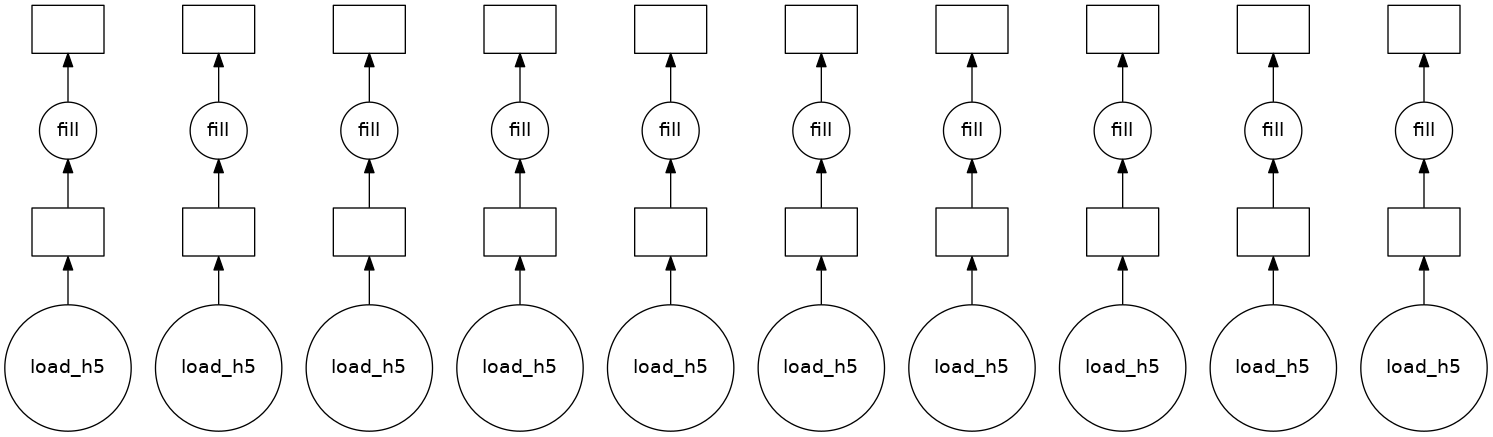

In [37]:
dask.visualize(histogramming.load_and_fill(file_list = x[:10]))

In [38]:
#%%time
#temp = dask.compute(histogramming.load_and_fill(data_column = 'rljet_pt_comb',file_list = x[:200]))

In [39]:
%%time
xxxxx = histogramming.compute_histograms(chunk_size = 100, histogram_variables = histo_var_dict, file_list = x[:])

CPU times: user 17.7 s, sys: 2.04 s, total: 19.7 s
Wall time: 50.1 s


In [40]:
a = histogramming.histograms_computed[1][0]
b = histogramming.histograms_computed[0][0]

a+b

Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double()) # Sum: 24438.0 (75154.0 with flow)

In [41]:
len(histogramming.histograms_computed)


891

In [42]:
zzz, histograms_named = histogramming.combine_histograms()



In [43]:
histograms_named


{'rljet_pt_comb': Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double()) # Sum: 7904609.0 (16142323.0 with flow),
 'rljet_m_comb[:,0]': Hist(Regular(20, 50000, 500000, name='x', label='m [MeV]'), storage=Double()) # Sum: 16021483.0 (16142323.0 with flow),
 'rljet_Angularity': Hist(Regular(20, 0, 0.1, name='x', label='Angularity'), storage=Double()) # Sum: 16142323.0,
 'rljet_Aplanarity': Hist(Regular(20, 0, 1, name='x', label='Aplanarity'), storage=Double()) # Sum: 16142321.0 (16142323.0 with flow),
 'rljet_C2': Hist(Regular(20, 0, 1, name='x', label='$C_{2}$'), storage=Double()) # Sum: 16142321.0 (16142323.0 with flow),
 'rljet_D2': Hist(Regular(20, 0, 6, name='x', label='$D_{2}$'), storage=Double()) # Sum: 16121708.0 (16142323.0 with flow),
 'rljet_Dip12': Hist(Regular(20, 0, 2, name='x', label='Dip12'), storage=Double()) # Sum: 16135010.0 (16142323.0 with flow),
 'rljet_ECF1': Hist(Regular(20, 0, 1e+07, name='x', label='ECF$_{1}$'), storage=Double()) # S

In [44]:
len(histograms_named)

93

In [45]:
zzz[0]

Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double()) # Sum: 7904609.0 (16142323.0 with flow)

In [46]:
for attribute, value in zzz[20].__dict__.items():
    print(attribute, '=', value)

name = None
label = None
_variance_known = False
metadata = None


In [47]:
len(xxxxx)

891

In [48]:
xxxxx[0][0]

Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double()) # Sum: 7904609.0 (16142323.0 with flow)

In [49]:
min([len(x) for x in xxxxx])

93

In [50]:
#dask.visualize(histogramming.load_and_fill(data_column = 'rljet_pt_comb',file_list = x[:4]))

In [51]:
psutil.virtual_memory().percent

31.9

In [52]:
%%time
histogram_list = []
i = -1
for file in x[:20]:
    temp = pd.read_hdf(file)
    col_list = list(temp.columns)
    histogram_list.append([])
    i += 1
    for col in col_list:
        
        if histo_var_dict.get(col) != None:
            
            ssss = hist.Hist(histo_var_dict[col])
            ssss.fill(temp[col])
            histogram_list[i].append(ssss)
        
        

CPU times: user 2.23 s, sys: 702 ms, total: 2.93 s
Wall time: 3.06 s


In [53]:
histogram_list[0][1]

Hist(Regular(20, 0, 1, name='x', label='Sphericity'), storage=Double()) # Sum: 27047.0

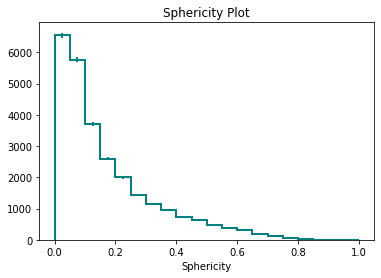

In [54]:
fig, ax = plt.subplots(figsize=(6, 4))

plt.title("Sphericity Plot")
histogram_list[0][1].plot1d(ax=ax, ls="-", color="teal", lw=2)
plt.savefig("plot_test.jpeg")
plt.show()

In [55]:
type(ax)

matplotlib.axes._subplots.AxesSubplot